In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("college_student_placement_dataset.csv")

In [27]:
print("Initial Data Preview:")
df

Initial Data Preview:


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...,...
417,CLG0023,101,5.02,4.61,5,0,7,3,4,0
448,CLG0022,92,6.65,6.69,4,0,6,10,3,0
473,CLG0060,120,6.41,6.30,8,0,4,2,5,0
565,CLG0002,93,5.12,4.99,10,1,7,8,4,0


In [4]:
print("\nChecking for duplicates...")
print(df.duplicated().sum())


Checking for duplicates...
0


In [5]:
df = df.drop_duplicates(subset="College_ID")

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64


In [7]:
df["Internship_Experience"] = df["Internship_Experience"].map({"Yes": 1, "No": 0})
df["Placement"] = df["Placement"].map({"Yes": 1, "No": 0})

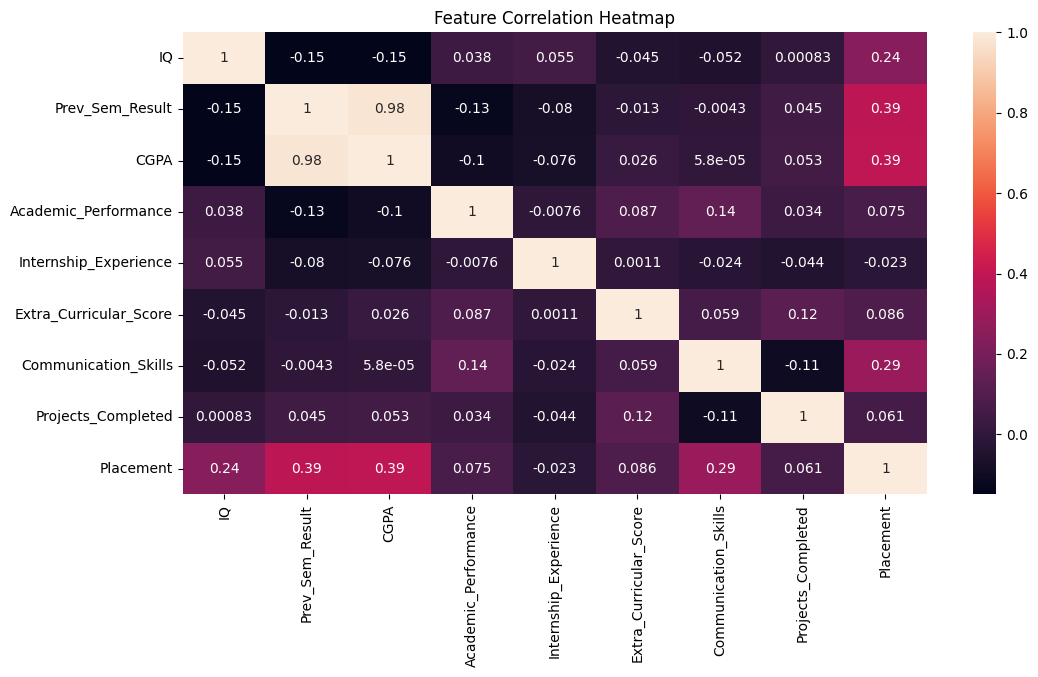

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


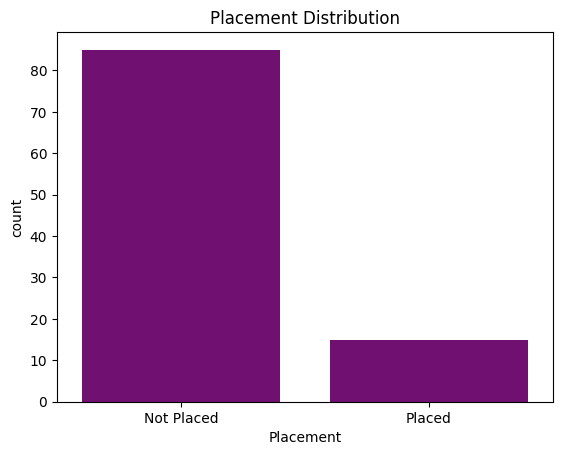

In [25]:
sns.countplot(x="Placement", data=df,color='purple')
plt.title("Placement Distribution")
plt.xticks([0, 1], ["Not Placed", "Placed"])
plt.show()

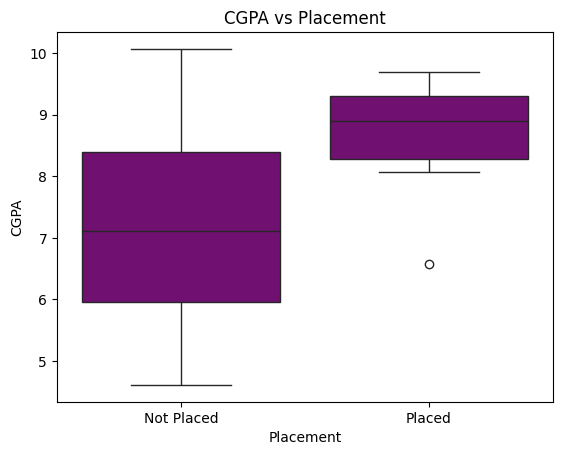

In [26]:
sns.boxplot(x="Placement", y="CGPA", data=df,color='purple')
plt.title("CGPA vs Placement")
plt.xticks([0, 1], ["Not Placed", "Placed"])
plt.show()

In [11]:
X = df.drop(columns=["Placement", "College_ID"])
y = df["Placement"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = model.predict(X_test)

In [15]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9
Confusion Matrix:
 [[18  0]
 [ 2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



c:\Users\veena\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\veena\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\veena\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

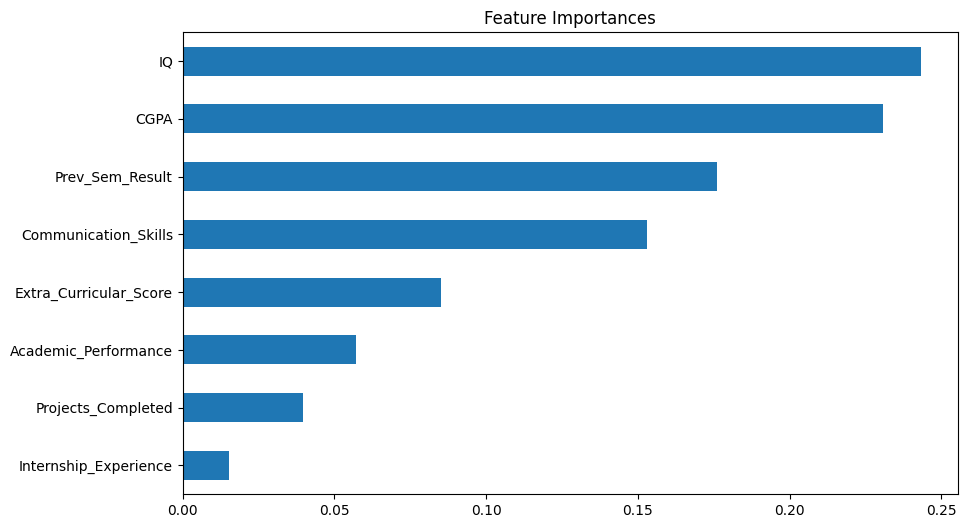

In [16]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind="barh", figsize=(10, 6))
plt.title("Feature Importances")
plt.show()